# Data Cleaning and Preparation Homework

Questions :

    Find out how many missing values you have within your dataset? 
    Which columns ? 
    What assumptions can you make about these missing values ( why do we have them missing ? )
    Get the mean , median , quartiles of each numerical variable within this dataset.
    Spot the possible outliers in your dataset and get rid of them.
    How many unique categories do you have ?
    Is there any column that we need to adjust its type ?
    Get how many tags you have and which are the most common tags ?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("inputs/videosUs.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41415 entries, 0 to 41414
Data columns (total 16 columns):
video_id                  41415 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null float64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null float64
likes                     40949 non-null float64
dislikes                  40949 non-null float64
comment_count             40949 non-null float64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null object
ratings_disabled          40949 non-null object
video_error_or_removed    40949 non-null object
description               40379 non-null object
dtypes: float64(5), object(11)
memory usage: 5.1+ MB


In [3]:
def get_missing_values(df):
    return df.isnull().sum()
get_missing_values(df)

video_id                     0
trending_date              466
title                      466
channel_title              466
category_id                466
publish_time               466
tags                       466
views                      466
likes                      466
dislikes                   466
comment_count              466
thumbnail_link             466
comments_disabled          466
ratings_disabled           466
video_error_or_removed     466
description               1036
dtype: int64

### Assumptions about missing values

In [4]:
# Get the mean , median , quartiles of each numerical variable within this dataset
def get_statistics(df):
    
    return df.describe()
get_statistics(df)

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


<AxesSubplot:>

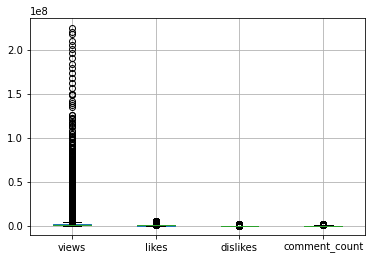

In [5]:
# Spot any possible outliers
def spot_outliers(df):
    columns = ["views","likes","dislikes","comment_count"]
    boxplot = df.boxplot(column=columns)
    return boxplot

spot_outliers(df)

As we can see there are many outliers in the views column

In [6]:
# How many unique categories do you have ?
unique_category_count = len(df.category_id.unique())
print(f"There are {unique_category_count} unique categories")

There are 17 unique categories


#### Is there any column that we need to adjust its type ?
Yes. all non numerical columns need to be adjusted which are:
    - tags                     
    - comments_disabled
    - ratings_disabled 
    - video_error_or_removed

In [12]:
# Get how many tags you have and which are the most common tags ?
nb_tags = df.tags.count()
print(f"Number of tags : {nb_tags}")
print("Most common values : ")
df.tags.mode()


Number of tags : 40949
Most common values : 


0    [none]
dtype: object